In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
num = df.select_dtypes(exclude=['object', 'bool']).columns
cat = df.select_dtypes(include=['object','bool']).columns

print('Numeric: ', list(num) , '\n\nCategoric: ', list(cat))

Numeric:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'] 

Categoric:  ['Month', 'VisitorType', 'Weekend', 'Revenue']


In [ ]:
arr = ['SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']

for i in arr:
    print('{} : {}'.format(i, df[i].unique()))

SpecialDay : [0.  0.4 0.8 1.  0.2 0.6]
OperatingSystems : [1 2 4 3 7 6 8 5]
Browser : [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region : [1 9 2 3 4 5 6 7 8]
TrafficType : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


In [ ]:
for i in arr:
    df[i] = df[i].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

__VERİ ANALİZİ VE GÖRSELLEŞTİRME__

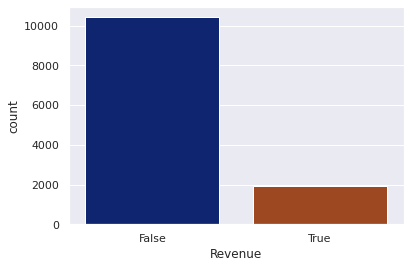

In [ ]:
sns.set_theme(style='darkgrid')

sns.countplot(df['Revenue'], palette='dark')

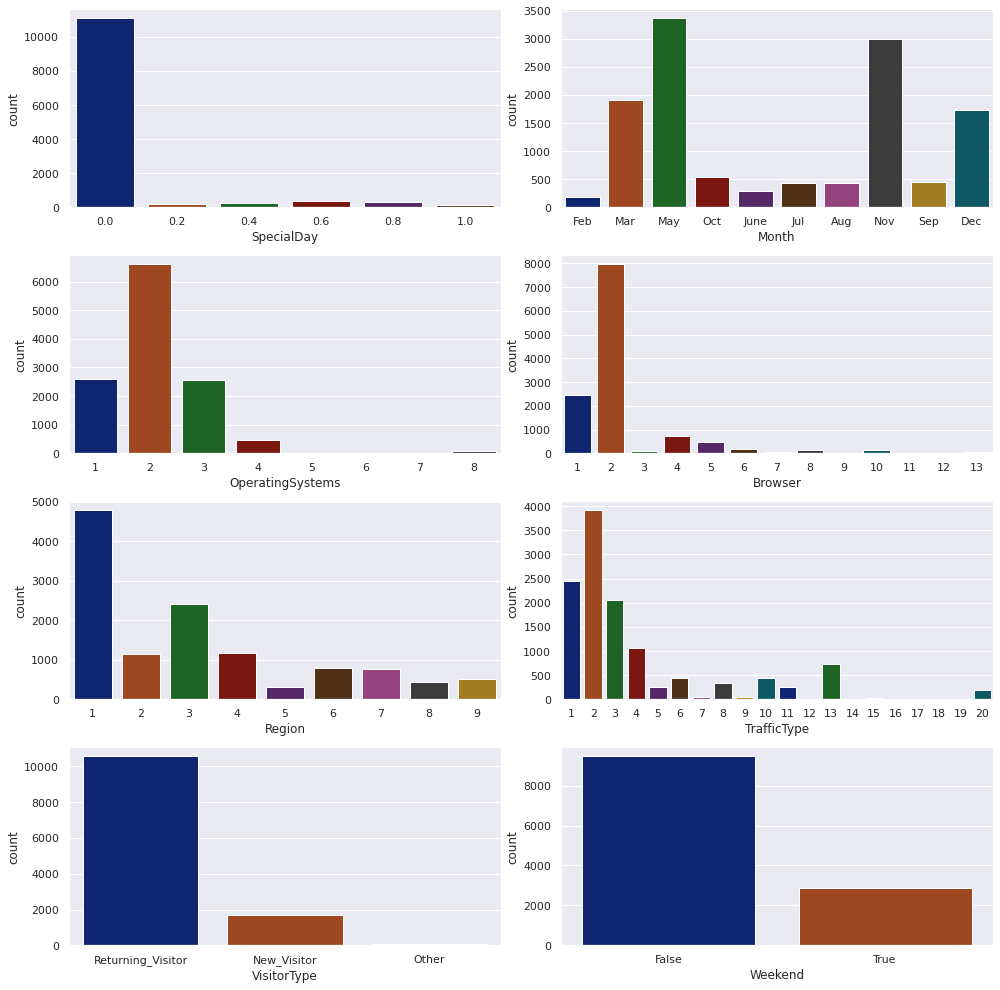

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(14,14))
fig.tight_layout(pad=2)

sns.countplot(df['SpecialDay'], palette='dark', ax = ax[0,0])
sns.countplot(df['Month'], palette='dark', ax = ax[0,1])
sns.countplot(df['OperatingSystems'], palette='dark', ax = ax[1,0])
sns.countplot(df['Browser'], palette='dark', ax = ax[1,1])
sns.countplot(df['Region'], palette='dark', ax = ax[2,0])
sns.countplot(df['TrafficType'], palette='dark', ax = ax[2,1])
sns.countplot(df['VisitorType'], palette='dark', ax = ax[3,0])
sns.countplot(df['Weekend'], palette='dark', ax = ax[3,1])

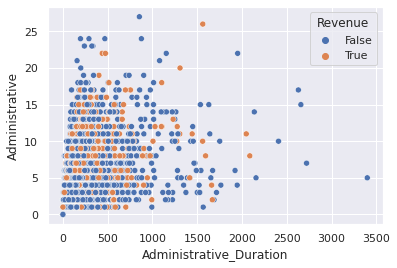

In [ ]:
sns.scatterplot(df['Administrative_Duration'], df['Administrative'], hue=df['Revenue'])

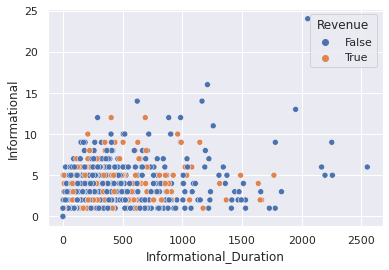

In [ ]:
sns.scatterplot(df['Informational_Duration'], df['Informational'], hue=df['Revenue'])

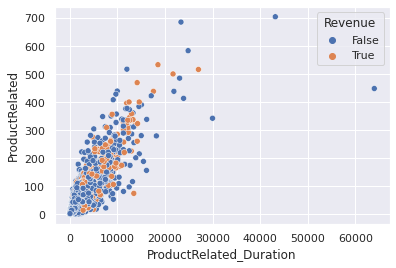

In [ ]:
sns.scatterplot(df['ProductRelated_Duration'], df['ProductRelated'], hue=df['Revenue'])

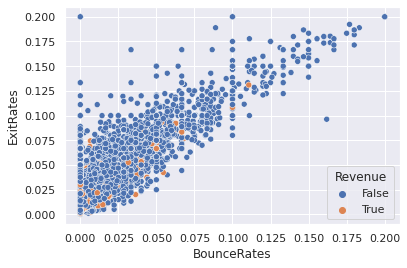

In [ ]:
sns.scatterplot(df['BounceRates'], df['ExitRates'], hue=df['Revenue'])

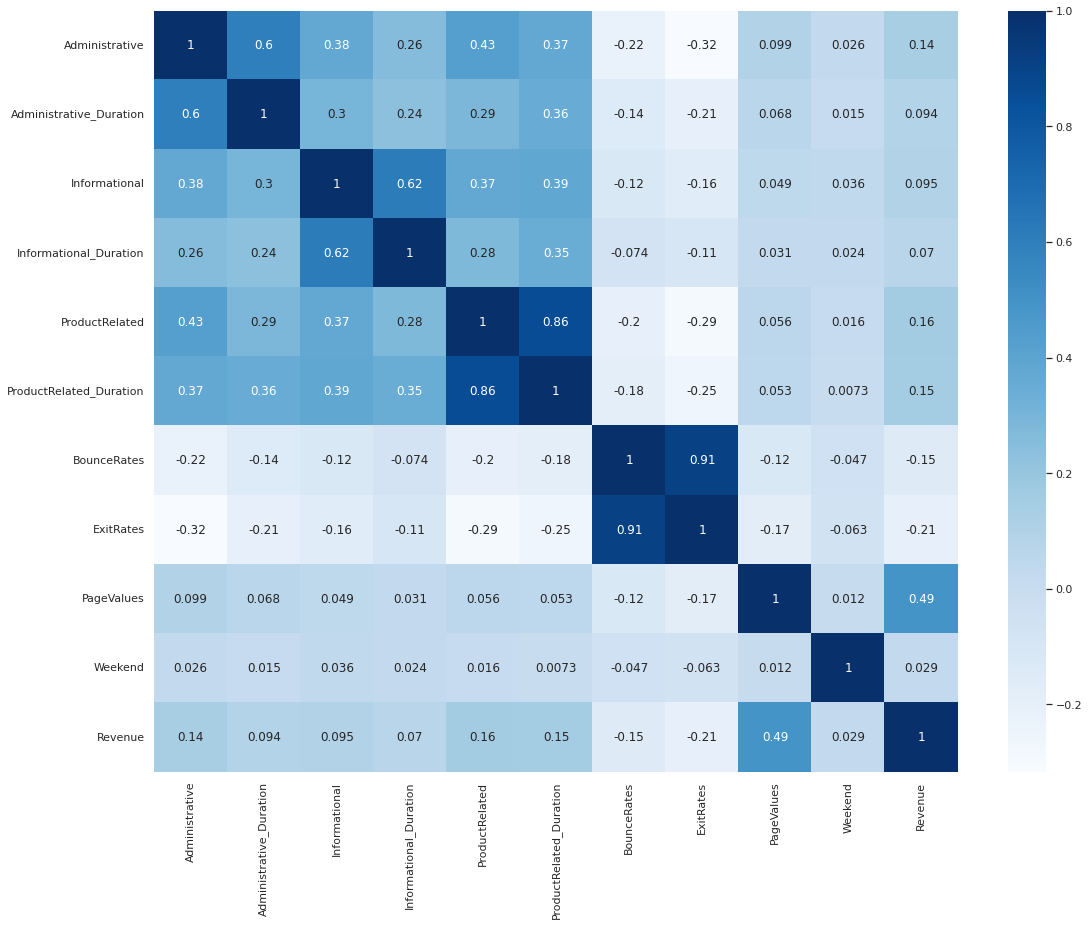

In [ ]:
# Korelasyon matrisi

plt.figure(figsize = (18,14))
sns.heatmap(df.corr(), cmap = 'Blues',annot = True)

In [ ]:
df.corr()['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

__NULL DEĞERLERİN HALLEDİLMESİ__

In [ ]:
df.isnull().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [ ]:
df.isnull().any().sum()

0

__KATEGORİK DEĞERLERİ NÜMERİK HALE GETİRME__

In [ ]:
cat_col = ['SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
df = pd.get_dummies(df, columns=cat_col, drop_first = True)

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'Traffi

In [ ]:
df.shape

(12330, 73)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


__TRAIN TEST SPLIT__


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df.rename(columns={'Revenue_True':'Revenue'}, inplace=True)

In [ ]:
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

__SMOTE__

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_train_sm,y_train_sm = smote.fit_resample(X_train_, y_train_)

In [ ]:
y_train_.value_counts()

0    6698
1    1193
Name: Revenue, dtype: int64

In [ ]:
y_train_sm.value_counts()

1    6698
0    6698
Name: Revenue, dtype: int64

__MODEL VE TRAINING__

In [ ]:
svc = SVC()

svc.fit(X_train_sm, y_train_sm)
y_pred = svc.predict(X_valid)
print("Accuracy: ", metrics.accuracy_score(y_valid, y_pred))
print("F1-score: ", metrics.f1_score(y_valid, y_pred))

Accuracy:  0.8403446528129752
F1-score:  0.5594405594405594


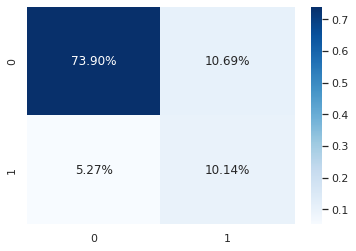

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm/np.sum(cm), cmap='Blues', fmt='.2%', annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, params, cv = 5,
                          scoring = 'accuracy',
                          return_train_score = True)

grid_search.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=9)

In [ ]:
grid_search.best_score_

0.9101268294585305

In [ ]:
best = grid_search.best_estimator_
y_pred = best.predict(X_valid)
print("Accuracy: ", metrics.accuracy_score(y_valid, y_pred))
print("F1-score: ", metrics.f1_score(y_valid, y_pred))

Accuracy:  0.8672072985301571
F1-score:  0.6213872832369943


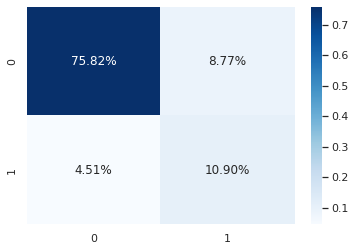

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm/np.sum(cm), cmap='Blues', fmt='.2%', annot=True)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_features': [2, 4, 8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [5, 10, 100]
}

forest_reg = RandomForestClassifier()

grid_search_rf = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'accuracy',
                          return_train_score = True)

grid_search_rf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_features': [2, 4, 8],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [5, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_features=8, min_samples_leaf=3, min_samples_split=8)

In [ ]:
grid_search_rf.best_score_

0.9320738691759567

In [ ]:
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_valid)
print("Accuracy: ", metrics.accuracy_score(y_valid, y_pred))
print("F1-score: ", metrics.f1_score(y_valid, y_pred))

Accuracy:  0.8834262544348708
F1-score:  0.6439628482972136


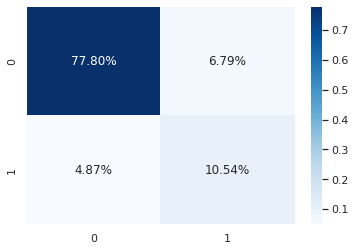

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm/np.sum(cm), cmap='Blues', fmt='.2%', annot=True)

__TEST__

In [ ]:
best_rf = grid_search_rf.best_estimator_
y_pred_test = best_rf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("F1-score: ", metrics.f1_score(y_valid, y_pred))

Accuracy:  0.8844282238442822
F1-score:  0.6439628482972136


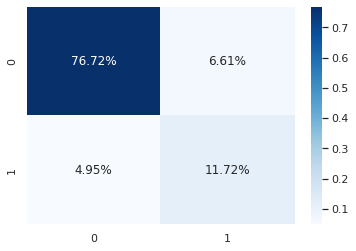

In [ ]:
cm_final = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_final/np.sum(cm_final), cmap='Blues', fmt='.2%', annot=True)